<h3> Importation des données

In [2]:
import pandas as pd
filepath = 'file:///D:/Lena/Desktop/OpenClassroom/Projet_4/df_clients_ventes_produits.csv'
df_clients_ventes_produits= pd.read_csv(filepath,delimiter=";",parse_dates=['date'])
df_clients_ventes_produits

,id_prod,date,session_id,client_id,sex,birth,price,categ,age,range,month,year_month
0,0_1483,2021-04-10,s_18746,c_4450,f,1977,4.99,0.0,45,25-45_y,4,2021-04
1,1_596,2021-09-12,s_88567,c_4450,f,1977,11.12,1.0,45,25-45_y,9,2021-09
2,1_278,2021-09-10,s_87835,c_4450,f,1977,19.18,1.0,45,25-45_y,9,2021-09
3,0_1447,2021-05-25,s_39094,c_4450,f,1977,4.99,0.0,45,25-45_y,5,2021-05
4,0_1357,2021-08-01,s_69919,c_4450,f,1977,15.99,0.0,45,25-45_y,8,2021-08
...,...,...,...,...,...,...,...,...,...,...,...,...
336811,2_147,2021-12-05,s_129519,c_4540,m,2003,181.99,2.0,19,15-25_y,12,2021-12
336812,2_19,2021-04-03,s_15300,c_5139,f,2000,69.99,2.0,22,15-25_y,4,2021-04
336813,2_37,2021-08-07,s_72476,c_5139,f,2000,48.99,2.0,22,15-25_y,8,2021-08
336814,1_493,2021-06-04,s_43928,c_4679,f,1930,10.99,1.0,92,65_y_et_+,6,2021-06


<h2> <center> Mission n°2 

<h3> 1) Détermination des indicateurs de tendance centrale et de dispersion par catégorie

--------------------
Catégorie 0.0
moyenne:
 10.64682823527424
médiane:
 9.99
mode:
 0    4.99
dtype: float64
écart-type:
 4.92880610565987


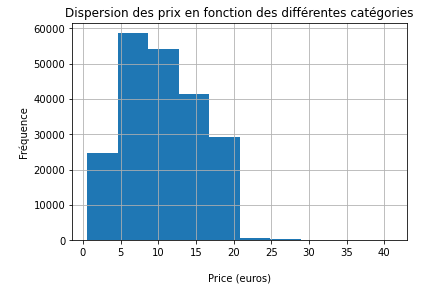

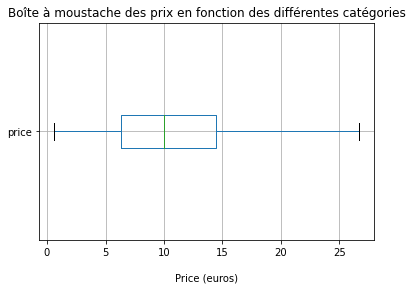

--------------------
Catégorie 1.0
moyenne:
 20.480105800342763
médiane:
 19.08
mode:
 0    15.99
dtype: float64
écart-type:
 7.568921592453358


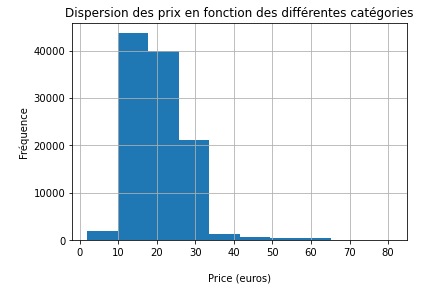

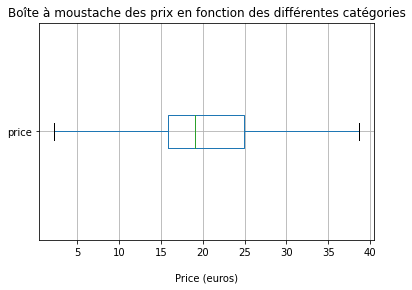

--------------------
Catégorie 2.0
moyenne:
 75.17494929352526
médiane:
 62.83
mode:
 0    68.99
dtype: float64
écart-type:
 39.07888553946345


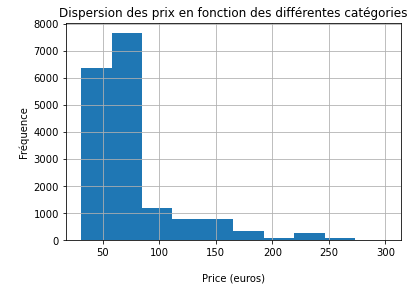

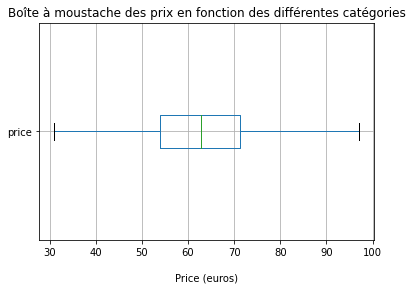

In [3]:
import matplotlib.pyplot as plt
for cat in df_clients_ventes_produits["categ"].unique():
    subset = df_clients_ventes_produits[df_clients_ventes_produits.categ == cat]
    print("-"*20)
    print("Catégorie " + str(cat))
    print("moyenne:\n",subset['price'].mean())
    print("médiane:\n",subset['price'].median())
    print("mode:\n",subset['price'].mode())
    print("écart-type:\n",subset['price'].std(ddof=0))

    subset["price"].hist()
    plt.title('Dispersion des prix en fonction des différentes catégories')
    plt.xlabel('\nPrice (euros)')
    plt.ylabel('\nFréquence')
    plt.show()
    subset.boxplot(column="price", vert=False, showfliers=False)
    plt.title('Boîte à moustache des prix en fonction des différentes catégories')
    plt.xlabel('\nPrice (euros)')
    plt.show()

Catégorie 0 : les prix varie entre 1 et 30 euro, la moyenne est de 10.6, la plus part des produits possèdent un prix entre 5 et 10 euro

Catégorie 1 : les prix varie entre 1 et 65 euro, la moyenne est de 20.5, la plus part des produits possèdent un prix entre 10 et 20 euro 

Catégorie 2 : les prix varie entre 20 et 275 euro, la moyenne est de 75.2, la plus part des produits possèdent un prix entre 60 et 80 euro

<h3> 2) Analyse de concentration via une courbe de Lorenz et l'indice de Gini

<h4> Regroupement par client_id

In [4]:
prix_client = df_clients_ventes_produits.groupby('client_id').agg({'price':'sum'})
prix_client

,price
client_id,
c_1,300.65
c_10,586.18
c_100,222.87
c_1000,980.02
c_1001,1102.45
...,...
c_995,119.08
c_996,739.60
c_997,572.89


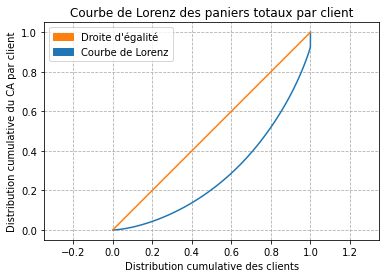

In [5]:
import numpy as np
import matplotlib.patches as mpatches
dep = prix_client['price']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title('Courbe de Lorenz des paniers totaux par client')
plt.xlabel('Distribution cumulative des clients')
plt.ylabel('Distribution cumulative du CA par client')
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

In [6]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.439716689539723

On observe une inégalité de distribution (qui n'est pas forte mais existante). Chaque client ne contribu pas de la même manière pour le chiffre d'affaire totale, certain dépense plus et d'autre moins. 

30 % des client genere 10% du chiffre d'affaire, les clients achètent pas de manière uniforme.

<h4> Regroupement par id_produit

In [7]:
prix_produit = df_clients_ventes_produits.groupby('id_prod').agg({'price':'sum'})
prix_produit

,price
id_prod,
0_0,2291.25
0_1,2736.51
0_10,215.40
0_100,41.20
0_1000,1518.48
...,...
2_95,296.97
2_96,13462.71
2_97,804.95


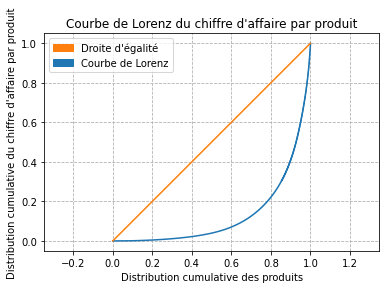

In [119]:
import numpy as np
import matplotlib.patches as mpatches

dep = prix_produit['price']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title("Courbe de Lorenz du chiffre d'affaire par produit")
plt.xlabel('Distribution cumulative des produits')
plt.ylabel("Distribution cumulative du chiffre d'affaire par produit")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

In [9]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.7384681954554047

Forte inégalité entre le prix de chaque produit (calcule de l'air sous la courbe élevé)

On observe une forte inégalité de distribution. Chaque produit ne contribu pas de la même manière pour le chiffre d'affaire totale, certain coûte plus et d'autre coûte moins.

70% des produits qui coûte le moins contribu que de 10% au chiffre d'affaire totale. les 30% derniers pourcent contribu de 90% du chiffre d'affaire. 

<h3> 3) Analyses univariées

<h3> 3.a) Analyses univariée des clients

<h4> Etude du nombre de clients 

In [10]:
nombre_client =  df_clients_ventes_produits['client_id'].nunique()
print('Actuellement il y a ' + str(nombre_client) + ' clients qui ont passés des commandes')

Actuellement il y a 8600 clients qui ont passés des commandes


<h4> Etude de l'âge des clients

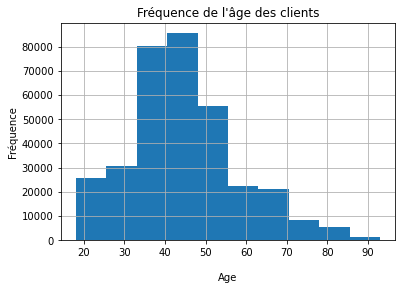

In [11]:
import matplotlib.pyplot as plt
df_clients_ventes_produits["age"].hist()
plt.title("Fréquence de l'âge des clients")
plt.xlabel('\nAge')
plt.ylabel('Fréquence')
plt.show()

La plus part des clients sont agé entre 40 et 50 ans

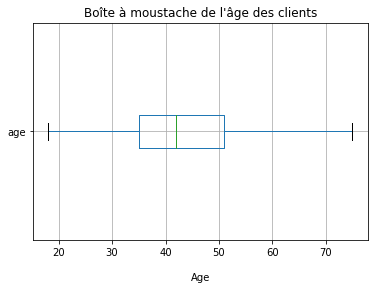

In [12]:
df_clients_ventes_produits.boxplot(column="age", vert=False, showfliers=False)
plt.title("Boîte à moustache de l'âge des clients")
plt.xlabel('\nAge')
plt.show()

Le médiane se trouve a 42 ans 

In [13]:
df_clients_ventes_produits["age"].describe()

count    336816.000000
mean         44.176604
std          13.523923
min          18.000000
25%          35.000000
50%          42.000000
75%          51.000000
max          93.000000
Name: age, dtype: float64

L'age minimum est 18 ans 

L'age maximum est de 93 ans

En moyenne les clients on 44 ans 

L'écart-type se trouve a 13.5 ceci représente la dispersion autour de la moyenne

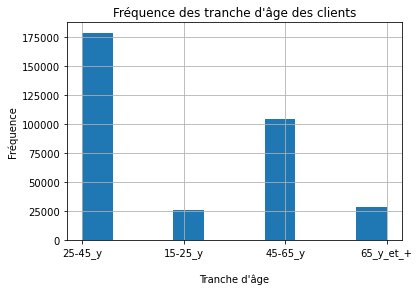

In [14]:
import matplotlib.pyplot as plt
df_clients_ventes_produits["range"].hist()
plt.title("Fréquence des tranche d'âge des clients")
plt.xlabel("\nTranche d'âge")
plt.ylabel('Fréquence')
plt.show()

Lorsqu'on les répartis dans des tranches d'age on observe que la majorité des clients se retrouve entre 25 et 45 ans

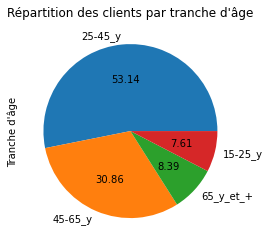

In [15]:
df_clients_ventes_produits["range"].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')
plt.title("Répartition des clients par tranche d'âge")
plt.ylabel("Tranche d'âge")
plt.show()

53 % des clients sont dans la tranche d'âge 25-45 ans et 30 % des clients sont dans la tranche 45-65 ans. La minorité des clients se trouve entre 15-25 et 65 ans et +. 

<h4> Etude du sexe des clients

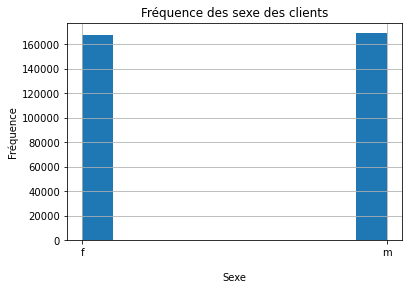

In [16]:
import matplotlib.pyplot as plt
df_clients_ventes_produits["sex"].hist(stacked=True)
plt.title("Fréquence des sexe des clients")
plt.xlabel("\nSexe")
plt.ylabel('Fréquence')
plt.show()

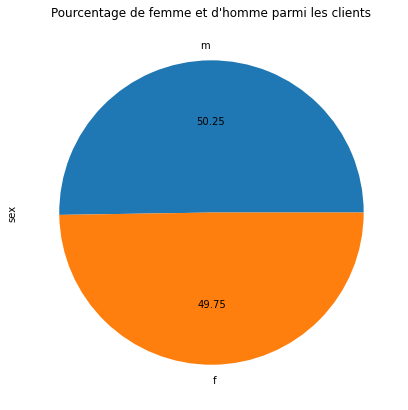

In [17]:
df_clients_ventes_produits["sex"].value_counts(normalize=True).plot(kind='pie',autopct='%.2f',figsize=(15,7))
plt.title("Pourcentage de femme et d'homme parmi les clients")
plt.show()

Parmi les clients, il y a un equilibre entre les hommes et les femmes (environ 50/50)

<h4> Etude du nombre de commande clients

In [114]:
df_nombre_client = df_clients_ventes_produits.groupby('client_id').agg({'session_id':'count'}).rename(columns={'client_id':'client_id','session_id':'nb_commande'})
df_nombre_client

,nb_commande
client_id,
c_1,20
c_10,28
c_100,6
c_1000,56
c_1001,58
...,...
c_995,8
c_996,42
c_997,23


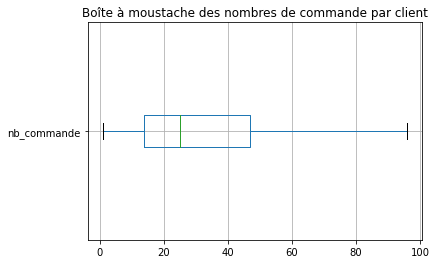

In [109]:
df_nombre_client.boxplot(column="nb_commande", vert=False, showfliers=False)
plt.title('Boîte à moustache des nombres de commande par client')
plt.show()

La plus part des clients effectue entre 15 et 45 commande

In [110]:
df_nombre_client["nb_commande"].describe()

count     8600.000000
mean        39.164651
std        156.448296
min          1.000000
25%         14.000000
50%         25.000000
75%         47.000000
max      12855.000000
Name: nb_commande, dtype: float64

En moyenne on se retrouve a 39 commande par clients

1 commandes par client est le minimum

12 855 est le maximum de commande par client

In [111]:
conditions3 = [
     (df_nombre_client['nb_commande'] > 0) & (df_nombre_client['nb_commande'] <= 20),
     (df_nombre_client['nb_commande'] > 20) & (df_nombre_client['nb_commande'] <= 40), 
     (df_nombre_client['nb_commande'] > 40) & (df_nombre_client['nb_commande'] <= 60),
     (df_nombre_client['nb_commande'] > 60) & (df_nombre_client['nb_commande'] <= 100),
     (df_nombre_client['nb_commande'] > 100) & (df_nombre_client['nb_commande'] <= 500),
     (df_nombre_client['nb_commande'] > 500)
 ]
price_count = ['achat_1-20','achat_20-40','achat_40-60','achat_60-100','achat_100-500','achat_500+']
df_nombre_client['range_nb_purchase']= np.select(conditions3,price_count)
df_nombre_client

,nb_commande,range_nb_purchase
client_id,,
c_1,20,achat_1-20
c_10,28,achat_20-40
c_100,6,achat_1-20
c_1000,56,achat_40-60
c_1001,58,achat_40-60
...,...,...
c_995,8,achat_1-20
c_996,42,achat_40-60
c_997,23,achat_20-40


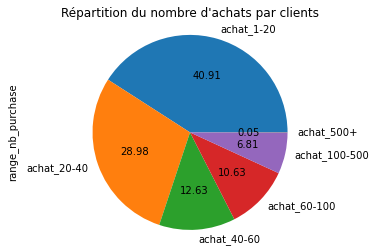

In [23]:
df_nombre_client["range_nb_purchase"].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')
plt.axis('equal')
plt.title("Répartition du nombre d'achats par clients")
plt.show()

40 % des clients effectue entre 1 et 20 commande, alors que 29% effectue entre 20 et 40 commandes

In [112]:
grand_client=df_nombre_client[df_nombre_client['nb_commande'] > 500]
grand_client

,nb_commande,range_nb_purchase
client_id,,
c_1609,12855,achat_500+
c_3454,3275,achat_500+
c_4958,2562,achat_500+
c_6714,4473,achat_500+


c_1609 est surement une entreprise 

In [116]:
client_1609=df_clients_ventes_produits.loc[df_clients_ventes_produits["client_id"]=="c_1609"]
client_1609

,id_prod,date,session_id,client_id,sex,birth,price,categ,age,range,month,year_month
4079,0_1420,2021-11-23,s_123928,c_1609,m,1980,11.53,0.0,42,25-45_y,11,2021-11
4080,1_281,2021-12-01,s_127578,c_1609,m,1980,23.99,1.0,42,25-45_y,12,2021-12
4081,0_1579,2021-05-03,s_29458,c_1609,m,1980,3.99,0.0,42,25-45_y,5,2021-05
4082,1_414,2022-02-23,s_169492,c_1609,m,1980,23.83,1.0,42,25-45_y,2,2022-02
4083,0_1163,2021-06-24,s_52929,c_1609,m,1980,9.99,0.0,42,25-45_y,6,2021-06
...,...,...,...,...,...,...,...,...,...,...,...,...
16929,0_2154,2021-04-12,s_19654,c_1609,m,1980,8.15,0.0,42,25-45_y,4,2021-04
16930,0_1472,2021-03-08,s_3500,c_1609,m,1980,12.49,0.0,42,25-45_y,3,2021-03
16931,0_1400,2021-10-18,s_106667,c_1609,m,1980,5.15,0.0,42,25-45_y,10,2021-10
16932,1_498,2021-07-18,s_64063,c_1609,m,1980,23.37,1.0,42,25-45_y,7,2021-07


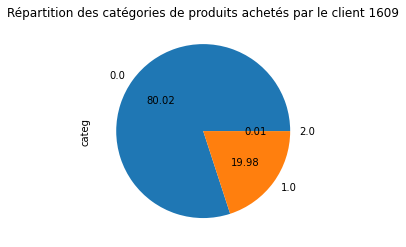

In [118]:
client_1609["categ"].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')
plt.title("Répartition des catégories de produits achetés par le client 1609")
plt.show()

<h3> 3.b) Analyse univariée des prix

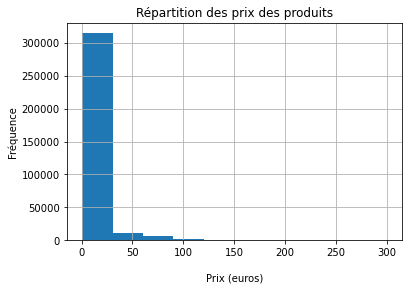

In [24]:
import matplotlib.pyplot as plt
df_clients_ventes_produits["price"].hist()
plt.title("Répartition des prix des produits")
plt.ylabel('Fréquence')
plt.xlabel('\nPrix (euros)')
plt.show()

La plus part des produits sont entre 0.62 et 25 euro

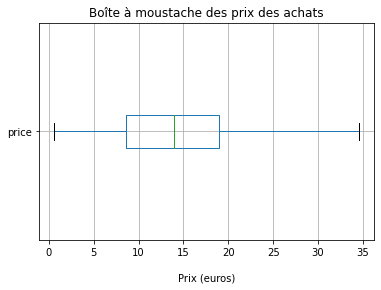

In [25]:
df_clients_ventes_produits.boxplot(column="price", vert=False, showfliers=False)
plt.title('Boîte à moustache des prix des achats')
plt.xlabel('\nPrix (euros)')
plt.show()

La médiane se situe environ a 14 euros

In [26]:
df_clients_ventes_produits["price"].describe()

count    336816.000000
mean         17.213180
std          17.853084
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

En moyenne les achats effectué sont de 17 euros 

Le minimum d'achat est de 0.62 euro 

Le maximum d'achat observé est de 300 euros

L'écart type est d'environ 18 euros

<h3> 3.c) Analyse univariée des catégories

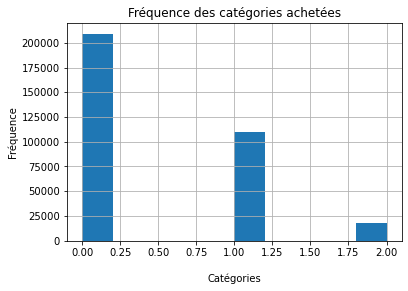

In [27]:
import matplotlib.pyplot as plt
df_clients_ventes_produits["categ"].hist()
plt.title("Fréquence des catégories achetées")
plt.xlabel('\nCatégories')
plt.ylabel('Fréquence')
plt.show()

La catégorie 0 est celle qui est le plus fréquament acheté, suivie de la catégorie 1 puis de la catégorie 2

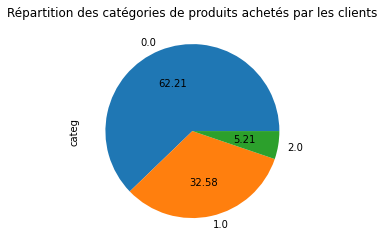

In [28]:
df_clients_ventes_produits["categ"].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')
plt.title("Répartition des catégories de produits achetés par les clients")
plt.show()

La catégorie 0 est celle qui est le plus souvent achetée (62%) suivie de la catégorie 1 avec 33%. 

<h3> 3.d) Analyse univariée des périodes d'achat 

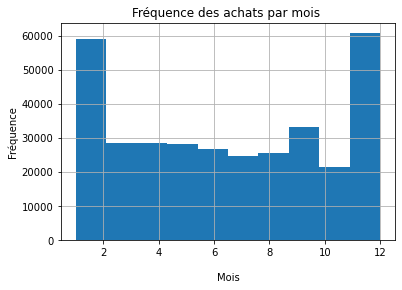

In [29]:
import matplotlib.pyplot as plt
df_clients_ventes_produits["month"].hist()
plt.title("Fréquence des achats par mois ")
plt.ylabel('Fréquence')
plt.xlabel('\nMois')
plt.show()

La plus part des achats s'effectue en janvier et en décembre, avec une chute en octobre

<h3> 3.e) Analyse univariée des produits 

In [30]:
nombre_produit = df_clients_ventes_produits.groupby('id_prod').agg({'id_prod':'count'})
nombre_produit 

,id_prod
id_prod,
0_0,611
0_1,249
0_10,12
0_100,2
0_1000,222
...,...
2_95,3
2_96,281
2_97,5


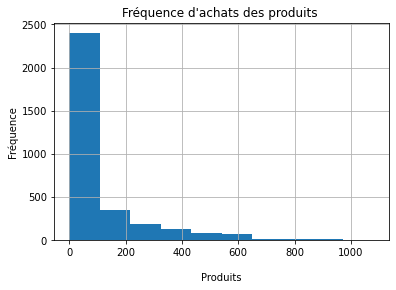

In [31]:
import matplotlib.pyplot as plt
nombre_produit["id_prod"].hist()
plt.title("Fréquence d'achats des produits ")
plt.ylabel('Fréquence')
plt.xlabel('\nProduits')
plt.show()

La plus part des produits sont achetés entre 1 et 100 fois 

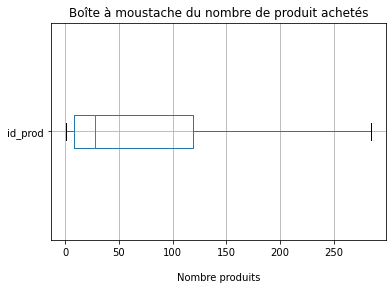

In [32]:
nombre_produit.boxplot(column="id_prod", vert=False, showfliers=False)
plt.title('Boîte à moustache du nombre de produit achetés')
plt.xlabel('\nNombre produits')
plt.show()

La médiane est de 28 

In [33]:
nombre_produit["id_prod"].describe()

count    3265.000000
mean      103.159571
std       163.217762
min         1.000000
25%         8.000000
50%        28.000000
75%       119.000000
max      1081.000000
Name: id_prod, dtype: float64

En minimum un produit est acheté une fois

En maximum le produit a été acheté 1081 fois 

En moyenne un produit est acheté 103 fois

In [34]:
Porduit_plus_achetés_15=nombre_produit.nlargest(15,'id_prod')
Porduit_plus_achetés_15

,id_prod
id_prod,
1_369,1081
1_417,1062
1_498,1036
1_414,1027
1_425,1013
1_398,952
1_406,946
1_413,944
1_403,939


<AxesSubplot:xlabel='id_prod'>

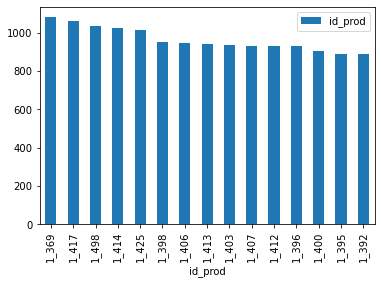

In [35]:
Porduit_plus_achetés_15.plot.bar()

On remarque que les 15 produits les plus acheté appartienne à la catégorie 1

<h3> 4) Analyse bivariées

<h3> 4.a) Analyse bivariées des dates et des prix

Date prix, client prix, cat prix, age prix ; commenter et ce qu'on interprète ; 
1 a univi 1 b vi ; 
regarder ce qu'il se passe en octobre 
tranche d'age et chiffre daffaire. 

In [36]:
depenses_mois = df_clients_ventes_produits.groupby(df_clients_ventes_produits['date'].dt.strftime('%Y-%m'))['price'].sum()
depenses_mois

date
2021-03    479407.851454
2021-04    473129.775595
2021-05    489453.124626
2021-06    481332.467798
2021-07    480941.247313
2021-08    479401.011454
2021-09    502899.041939
2021-10    319234.487798
2021-11    512996.638282
2021-12    523012.207798
2022-01    523008.544141
2022-02    532857.995110
Name: price, dtype: float64

In [37]:
depenses_mois.sum()

5797674.3933072435

Le chiffre d'affaire entre le mois de mars 2021 et février 2022 est d'environ de 580 000 euros

In [38]:
depenses_mois.describe()

count        12.000000
mean     483139.532776
std       55574.764637
min      319234.487798
25%      479406.141454
50%      485392.796212
75%      515499.614747
max      532857.995110
Name: price, dtype: float64

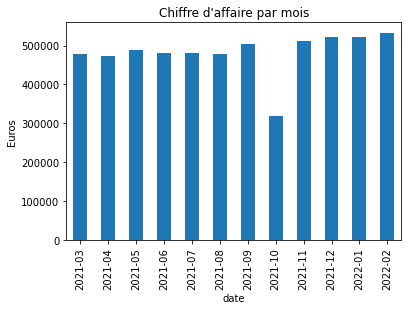

In [39]:
depenses_mois_graph=depenses_mois.plot.bar(x='date',y='price')
plt.title("Chiffre d'affaire par mois")
plt.ylabel("Euros")
plt.show()

Lorsqu'on compare les différents chiffre d'affaire par mois on remarque une diminution du mois d'octobre d'environ 25% 

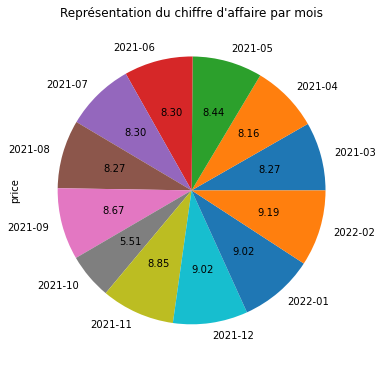

In [40]:
depenses_mois.plot.pie(subplots=True,autopct='%.2f',figsize=(6,10))
plt.title("Représentation du chiffre d'affaire par mois")
plt.show()

on remarque une légère augmentation du chiffre d'affaire a partir du mois de décembre 2021

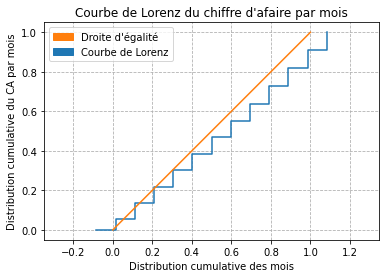

In [41]:
import numpy as np
import matplotlib.patches as mpatches
CA = depenses_mois.values
n = len(CA)
lorenz = np.cumsum(np.sort(CA)) / CA.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.xlabel('Distribution cumulative des mois')
plt.ylabel('Distribution cumulative du CA par mois')
plt.title("Courbe de Lorenz du chiffre d'afaire par mois")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

In [42]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.04809386987107478

Le coefficient de Gini est de 0.04 et donc proche de zéro, il y a une egalité entre les différents chiffre d'affaires

<h3> 4.b) Analyse bivariées des clients et des prix

<h4> Age des clients

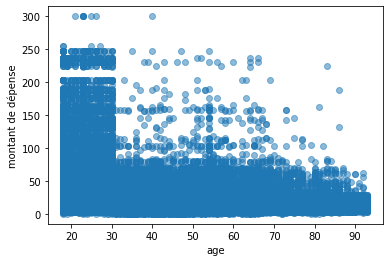

In [43]:
import matplotlib.pyplot as plt

plt.plot(df_clients_ventes_produits["age"],df_clients_ventes_produits["price"],'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant de dépense")
plt.show()


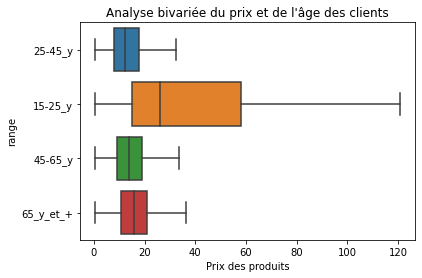

In [44]:
import seaborn as sns
y = df_clients_ventes_produits.range
x = df_clients_ventes_produits.price
boxplot_age_price=sns.boxplot(x=x, y=y,data=df_clients_ventes_produits,orient="h", showfliers=False)
boxplot_age_price.set_xlabel('Prix des produits')
boxplot_age_price.set_title("Analyse bivariée du prix et de l'âge des clients")
plt.show()

Les clients agé entre 15 et 25 ans ont tendance a acheté des produits plus coûteux

In [45]:
tranche_age = df_clients_ventes_produits.groupby('range').agg({'price':'sum'})
tranche_age                                                 

,price
range,
15-25_y,1.064823e+06
25-45_y,2.695416e+06
45-65_y,1.569056e+06
65_y_et_+,4.683802e+05


Text(0.5, 1.0, "Représentation du chiffre d'affaire par tranche d'âge")

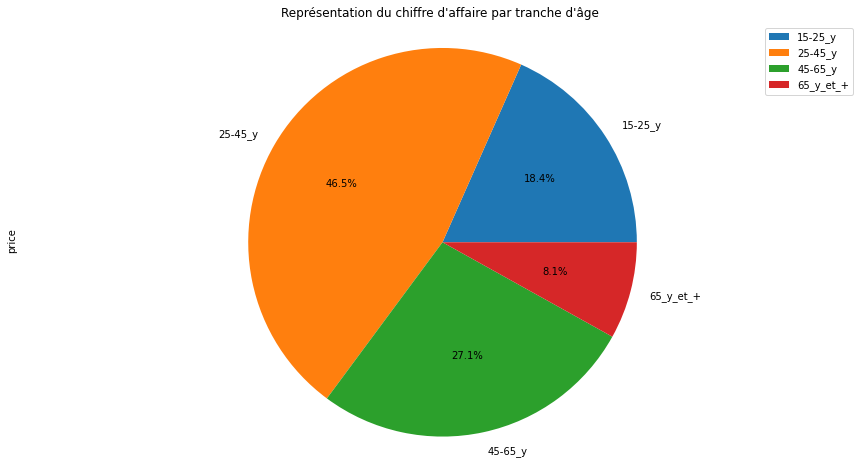

In [46]:
import matplotlib.pyplot as plt
tranche_age_pie= tranche_age.plot.pie(subplots=True, figsize=(15,8), autopct='%1.1f%%')
plt.axis('equal')
plt.title("Représentation du chiffre d'affaire par tranche d'âge")

46% du chiffre d'affaire est réaliser grâce au achat des clients agé entre 25 et 45 ans.

<h4> Sexe des clients

In [47]:
sex_achat = df_clients_ventes_produits.groupby('sex').agg({'price':'sum'})
sex_achat   

,price
sex,
f,2.859761e+06
m,2.937914e+06


Text(0, 0.5, "Chiffre d'affaire (Euros)")

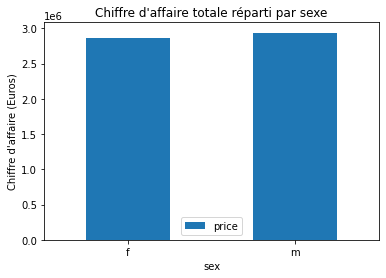

In [48]:
sex_achat_graph=sex_achat.plot.bar(rot=0)
plt.title("Chiffre d'affaire totale réparti par sexe")
plt.ylabel("Chiffre d'affaire (Euros)")

La somme totale dépenser par les hommes et les femmes sont équivalente 

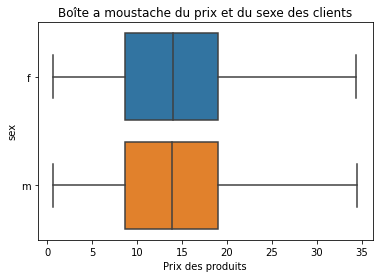

In [49]:
import seaborn as sns
y = df_clients_ventes_produits.sex
x = df_clients_ventes_produits.price
boxplot_age_price=sns.boxplot(x=x, y=y,data=df_clients_ventes_produits,orient="h", showfliers=False)
boxplot_age_price.set_xlabel('Prix des produits')
boxplot_age_price.set_title("Boîte a moustache du prix et du sexe des clients")
plt.show()

Le prix des achats des hommes et des femmes sont équivalentes 

In [50]:
sex_mois_achat = df_clients_ventes_produits.groupby(['year_month','sex']).agg({'sex':'count'}).rename(columns={'sex': 'sex','sex':'sex_count'})
sex_mois_achat_reset=sex_mois_achat.reset_index()
sex_mois_achat_reset

,year_month,sex,sex_count
0,2021-03,f,14149
1,2021-03,m,14419
2,2021-04,f,14263
3,2021-04,m,14152
4,2021-05,f,14187
5,2021-05,m,14058
6,2021-06,f,13281
7,2021-06,m,13538
8,2021-07,f,12273
9,2021-07,m,12443


In [51]:
sex_mois_achat_reset.set_index('year_month')

,sex,sex_count
year_month,,
2021-03,f,14149
2021-03,m,14419
2021-04,f,14263
2021-04,m,14152
2021-05,f,14187
2021-05,m,14058
2021-06,f,13281
2021-06,m,13538
2021-07,f,12273


In [52]:
pivot_sex_mois_achat= pd.pivot(sex_mois_achat_reset,index=['year_month'],values=['sex_count'],columns='sex')
pivot_sex_mois_achat

sex_count       
sex                f      m
year_month                 
2021-03        14149  14419
2021-04        14263  14152
2021-05        14187  14058
2021-06        13281  13538
2021-07        12273  12443
2021-08        12745  12874
2021-09        16382  16884
2021-10        10487  11097
2021-11        14036  14241
2021-12        16122  16302
2022-01        14792  14524
2022-02        14858  14709

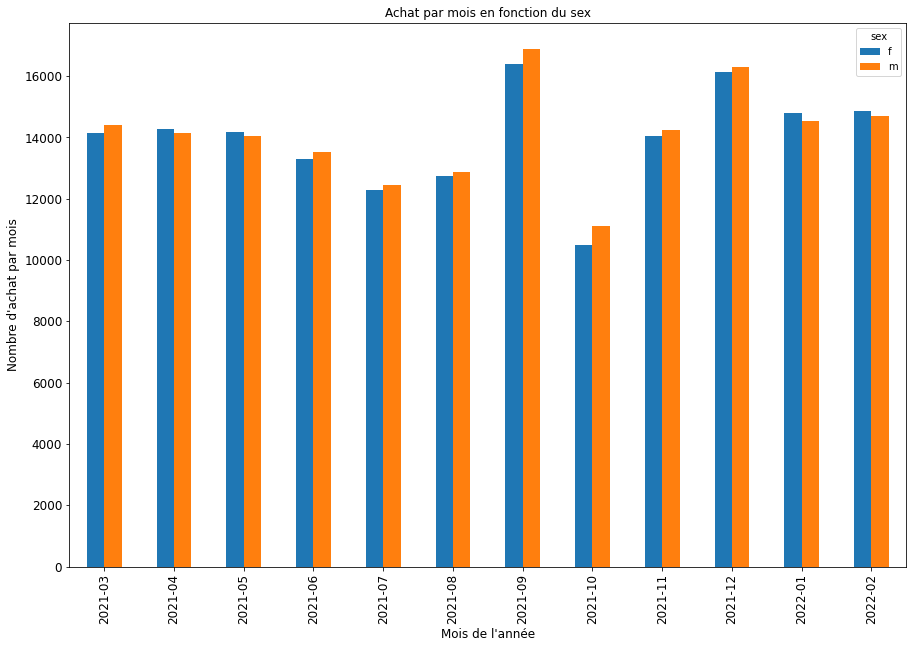

In [53]:
import matplotlib.pyplot as plt
ax = pivot_sex_mois_achat['sex_count'].plot(kind='bar', title ="Achat par mois en fonction du sex", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Mois de l'année", fontsize=12)
ax.set_ylabel("Nombre d'achat par mois", fontsize=12)

plt.show()

On n'observe pas de différence du nombre d'achat par mois entres les hommes et les femmes

<h3> 4.c) Analyse bivariées des catégories de produit et des prix

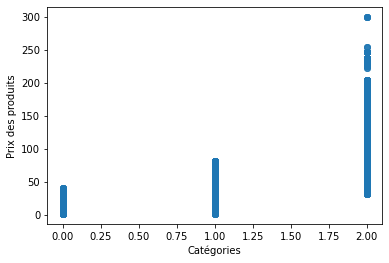

In [54]:
import matplotlib.pyplot as plt

plt.plot(df_clients_ventes_produits["categ"],df_clients_ventes_produits["price"],'o',alpha=0.5)
plt.xlabel("Catégories")
plt.ylabel("Prix des produits")
plt.show()

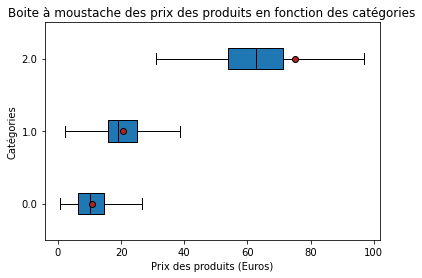

In [55]:
X = "categ"
Y = "price" 

sous_echantillon = df_clients_ventes_produits.copy()

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
          vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boite à moustache des prix des produits en fonction des catégories')
plt.xlabel('Prix des produits (Euros)')
plt.ylabel('Catégories')
plt.show()

Les prix de la catégorie 2 sont plus élevés que celle de la catégorie 0 et 1

<h3> 4.d) Analyse bivariées des catégories et du sexe des clients

In [56]:
sex_categ=df_clients_ventes_produits.groupby(['sex','categ']).agg({'categ':'count'}).rename(columns={'categ':'categ_count'})
sex_categ_reset=sex_categ.reset_index()
sex_categ_reset

,sex,categ,categ_count
0,f,0.0,103846
1,f,1.0,55469
2,f,2.0,8260
3,m,0.0,105683
4,m,1.0,54266
5,m,2.0,9292


In [57]:
pivot_sex_categ= sex_categ_reset.pivot(index=['categ'],values=['categ_count'],columns=['sex'])
pivot_sex_categ

categ_count        
sex             f       m
categ                    
0.0        103846  105683
1.0         55469   54266
2.0          8260    9292

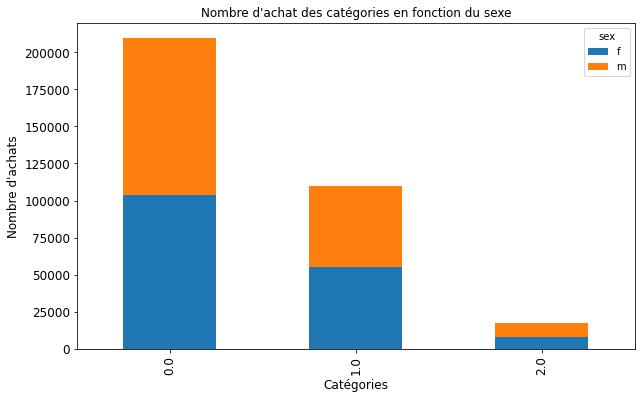

In [58]:
ax = pivot_sex_categ['categ_count'].plot(kind='bar', title ="Nombre d'achat des catégories en fonction du sexe", figsize=(10, 6), legend=True, fontsize=12,stacked=True)
ax.set_xlabel("Catégories", fontsize=12)
ax.set_ylabel("Nombre d'achats", fontsize=12)

plt.show()

Le nombre d'achat des différentes categories est équivalente entre les hommes et les femmes

<h3> 4.e) Analyse bivariée des catégories de produits et de l'âge des clients

In [59]:
age_categ=df_clients_ventes_produits.groupby(['range','categ']).agg({'categ':'count'}).rename(columns={'categ':'categ_count'})
age_categ_reset=age_categ.reset_index()
age_categ_reset

,range,categ,categ_count
0,15-25_y,0.0,5380
1,15-25_y,1.0,9491
2,15-25_y,2.0,10751
3,25-45_y,0.0,130758
4,25-45_y,1.0,42391
5,25-45_y,2.0,5832
6,45-65_y,0.0,60909
7,45-65_y,1.0,42295
8,45-65_y,2.0,739
9,65_y_et_+,0.0,12482


In [60]:
pivot_age_categ= age_categ_reset.pivot(index=['categ'],values=['categ_count'],columns=['range'])
pivot_age_categ

categ_count                          
range     15-25_y 25-45_y 45-65_y 65_y_et_+
categ                                      
0.0          5380  130758   60909     12482
1.0          9491   42391   42295     15558
2.0         10751    5832     739       230

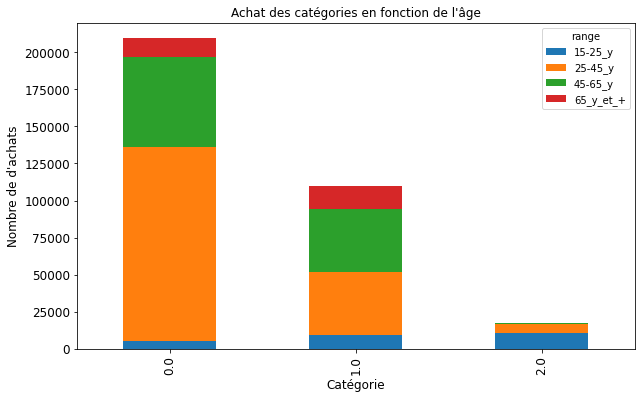

In [61]:
ax = pivot_age_categ['categ_count'].plot(kind='bar', title ="Achat des catégories en fonction de l'âge", figsize=(10, 6), legend=True, fontsize=12,stacked=True)
ax.set_xlabel("Catégorie", fontsize=12)
ax.set_ylabel("Nombre de d'achats", fontsize=12)

plt.show()

La catégorie 0 est plus acheté, suivie de la catégorie 1. 

On remarque pour la catégorie 0 que la plus part des achats (62%) sont effectué par des clients qui ont 25 à 45 ans et 30% est effectuer par les clients entre 45 et 65 ans.

Pour la catégorie 1 : 40 % des achat sont effectuer par les 45 à 65 ans et les 40 autres % par les 25 à 45 ans. 

Pour la catégorie 2 : 60 % des achats sont effectué par des clients agé entre 15 et 25 ans


<h3> 4.f) Analyse bivariée du nombre d'achats des différentes catégories et de la date 

In [62]:
mois_categ=df_clients_ventes_produits.groupby(['year_month','categ']).agg({'price':'sum','categ':'count'}).rename(columns={'categ': 'categ','price':'sum_price','categ':'categ_count'})
mois_categ_reset=mois_categ.reset_index()

In [63]:
mois_categ_reset.set_index('year_month')

,categ,sum_price,categ_count
year_month,,,
2021-03,0.0,193662.201454,18119
2021-03,1.0,186974.170000,9134
2021-03,2.0,98771.480000,1315
2021-04,0.0,205308.725595,19335
2021-04,1.0,156138.350000,7579
2021-04,2.0,111682.700000,1501
2021-05,0.0,196200.134626,18485
2021-05,1.0,165893.400000,8107
2021-05,2.0,127359.590000,1653


In [64]:
pivot_mois_categ= mois_categ_reset.pivot(index=['year_month'],values=['categ_count'],columns='categ')
pivot_mois_categ

categ_count             
categ              0.0    1.0   2.0
year_month                         
2021-03          18119   9134  1315
2021-04          19335   7579  1501
2021-05          18485   8107  1653
2021-06          15886   9264  1669
2021-07          13569   9169  1978
2021-08          15717   7954  1948
2021-09          23124   9268   874
2021-10          18758   1666  1160
2021-11          14588  12316  1373
2021-12          19289  12259   876
2022-01          15386  12560  1370
2022-02          17273  10459  1835

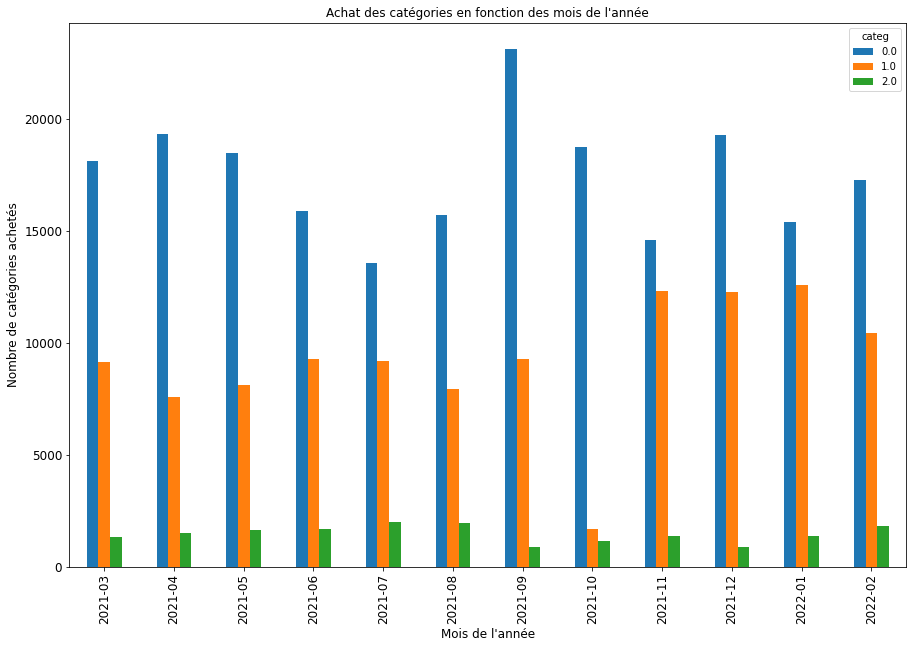

In [65]:
import matplotlib.pyplot as plt
ax = pivot_mois_categ['categ_count'].plot(kind='bar', title ="Achat des catégories en fonction des mois de l'année", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Mois de l'année", fontsize=12)
ax.set_ylabel("Nombre de catégories achetés", fontsize=12)

plt.show()

La catégorie 0 est la plus acheté, suivie de la catégorie 1. 

Pour le mois d'octobre on observe une chute des achats pour la catégories 1.  

<h3> 4.g) Analyse bivariée du CA et des catégories de produit dans le temps

In [66]:
pivot_categ_price_mois= mois_categ_reset.pivot(index=['year_month'],values=['sum_price'],columns='categ')
pivot_categ_price_mois

sum_price                      
categ                 0.0        1.0        2.0
year_month                                     
2021-03     193662.201454  186974.17   98771.48
2021-04     205308.725595  156138.35  111682.70
2021-05     196200.134626  165893.40  127359.59
2021-06     167960.867798  189162.04  124209.56
2021-07     144754.507313  188523.27  147663.47
2021-08     167773.641454  162991.38  148635.99
2021-09     246391.971939  190613.78   65893.29
2021-10     199292.467798   33762.32   86179.70
2021-11     155950.248282  252910.39  104136.00
2021-12     206050.967798  251026.75   65934.49
2022-01     164215.904141  256267.92  102524.72
2022-02     183257.635111  213120.64  136479.72

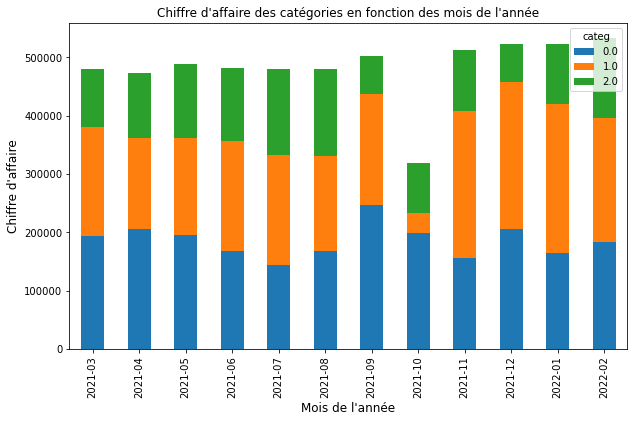

In [67]:
ax = pivot_categ_price_mois['sum_price'].plot(kind='bar', title ="Chiffre d'affaire des catégories en fonction des mois de l'année", figsize=(10, 6), legend=True, fontsize=10,stacked=True)
ax.set_xlabel("Mois de l'année", fontsize=12)
ax.set_ylabel("Chiffre d'affaire", fontsize=12)

plt.show()

On remarque une diminution du CA au mois d'octobre, visible pour la catégorie 1. Les mois suivant le chiffre d'affaire augmente.

<h3> 4.f) Analyse bivariée de la fréquence d'achat en fonction de la tranche d'âge

In [68]:
freq_age = df_clients_ventes_produits.groupby(['client_id','range']).agg({'id_prod':'count'}).rename(columns={'id_prod':'nb_commande'})
freq_age=freq_age.reset_index()
freq_age

,client_id,range,nb_commande
0,c_1,65_y_et_+,20
1,c_10,65_y_et_+,28
2,c_100,25-45_y,6
3,c_1000,45-65_y,56
4,c_1001,25-45_y,58
...,...,...,...
8595,c_995,65_y_et_+,8
8596,c_996,45-65_y,42
8597,c_997,25-45_y,23
8598,c_998,15-25_y,28


In [69]:
freq_age.set_index('client_id')

,range,nb_commande
client_id,,
c_1,65_y_et_+,20
c_10,65_y_et_+,28
c_100,25-45_y,6
c_1000,45-65_y,56
c_1001,25-45_y,58
...,...,...
c_995,65_y_et_+,8
c_996,45-65_y,42
c_997,25-45_y,23


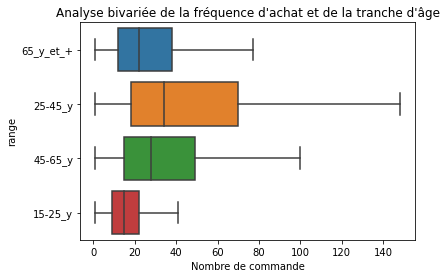

In [70]:
import seaborn as sns
y = freq_age.range
x = freq_age.nb_commande
boxplot_age_price=sns.boxplot(x=x, y=y,data=freq_age,orient="h", showfliers=False)
boxplot_age_price.set_xlabel('Nombre de commande')
boxplot_age_price.set_title("Analyse bivariée de la fréquence d'achat et de la tranche d'âge")
plt.show()

On remarque que les clients entre 25 et 45 ans ont une fréquence d'achat plus élevée. 

<h3> 4.g) Analyse bivariée du montant total des achats en fonction de la tranche d'âge des clients 

In [71]:
total_age = df_clients_ventes_produits.groupby(['client_id','range']).agg({'price':'sum'}).rename(columns={'price':'price_sum'})
total_age=total_age.reset_index()
total_age

,client_id,range,price_sum
0,c_1,65_y_et_+,300.65
1,c_10,65_y_et_+,586.18
2,c_100,25-45_y,222.87
3,c_1000,45-65_y,980.02
4,c_1001,25-45_y,1102.45
...,...,...,...
8595,c_995,65_y_et_+,119.08
8596,c_996,45-65_y,739.60
8597,c_997,25-45_y,572.89
8598,c_998,15-25_y,1527.69


In [72]:
total_age.set_index('client_id')

,range,price_sum
client_id,,
c_1,65_y_et_+,300.65
c_10,65_y_et_+,586.18
c_100,25-45_y,222.87
c_1000,45-65_y,980.02
c_1001,25-45_y,1102.45
...,...,...
c_995,65_y_et_+,119.08
c_996,45-65_y,739.60
c_997,25-45_y,572.89


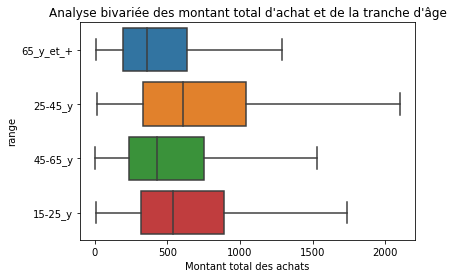

In [73]:
import seaborn as sns
y = total_age.range
x = total_age.price_sum
boxplot_age_price=sns.boxplot(x=x, y=y,data=total_age,orient="h", showfliers=False)
boxplot_age_price.set_xlabel('Montant total des achats')
boxplot_age_price.set_title("Analyse bivariée des montant total d'achat et de la tranche d'âge")
plt.show()

<h3> 5) Analyse de la chute de CA du mois d'octobre 2021

In [74]:
df_octobre =df_clients_ventes_produits[(df_clients_ventes_produits['year_month'] == '2021-10')]

df_octobre

,id_prod,date,session_id,client_id,sex,birth,price,categ,age,range,month,year_month
28,0_1060,2021-10-19,s_107003,c_4450,f,1977,12.53,0.0,45,25-45_y,10,2021-10
52,0_532,2021-10-14,s_104825,c_4450,f,1977,12.71,0.0,45,25-45_y,10,2021-10
55,0_1607,2021-10-19,s_107003,c_4450,f,1977,3.99,0.0,45,25-45_y,10,2021-10
57,0_1467,2021-10-27,s_110664,c_4450,f,1977,4.99,0.0,45,25-45_y,10,2021-10
99,1_390,2021-10-30,s_112221,c_4450,f,1977,8.58,1.0,45,25-45_y,10,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...
336674,1_412,2021-10-29,s_111785,c_7255,m,1983,16.65,1.0,39,25-45_y,10,2021-10
336675,0_1835,2021-10-29,s_111785,c_7255,m,1983,8.99,0.0,39,25-45_y,10,2021-10
336805,0_1446,2021-10-29,s_111837,c_3308,f,1991,8.09,0.0,31,25-45_y,10,2021-10
336806,0_1618,2021-10-29,s_111837,c_3308,f,1991,3.95,0.0,31,25-45_y,10,2021-10


In [75]:
achat_octobre = df_octobre.groupby(['date']).agg({'price':'count'}).rename(columns={'date': 'date','price':'price_count'})

achat_octobre

,price_count
date,
2021-10-01,1043
2021-10-02,687
2021-10-03,677
2021-10-04,639
2021-10-05,632
2021-10-06,726
2021-10-07,623
2021-10-08,713
2021-10-09,675


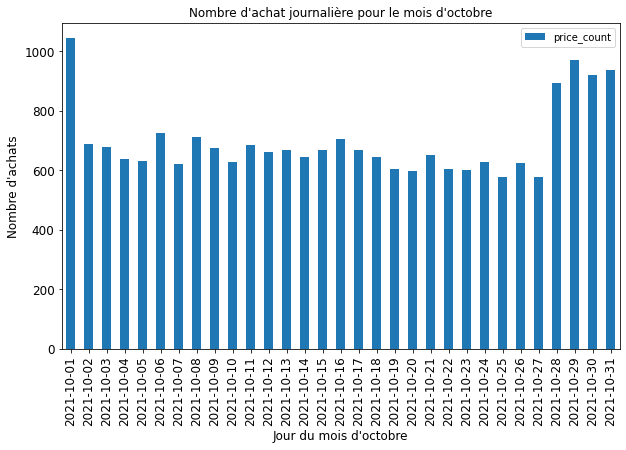

In [76]:
ax = achat_octobre['price_count'].plot(kind='bar', title ="Nombre d'achat journalière pour le mois d'octobre", figsize=(10, 6), legend=True, fontsize=12)
ax.set_xlabel("Jour du mois d'octobre", fontsize=12)
ax.set_xticklabels(achat_octobre.index.format())
ax.set_ylabel("Nombre d'achats", fontsize=12)

plt.show()

On observe une baisse du nombre d'achat du 2 octobre jusqu'au 27.

In [77]:
CA_octobre = df_octobre.groupby(['date','categ']).agg({'price':'sum'}).rename(columns={'date': 'date','price':'price_sum'})
CA_octobre_reset=CA_octobre.reset_index()
CA_octobre_reset.head()

,date,categ,price_sum
0,2021-10-01,0.0,6947.51
1,2021-10-01,1.0,7003.79
2,2021-10-01,2.0,2958.06
3,2021-10-02,0.0,7138.02
4,2021-10-02,2.0,1895.13


In [78]:
pivot_CA_octobre= CA_octobre_reset.pivot(index=['date'],values=['price_sum'],columns='categ')
pivot_CA_octobre

price_sum                  
categ               0.0      1.0      2.0
date                                     
2021-10-01  6947.510000  7003.79  2958.06
2021-10-02  7138.020000      NaN  1895.13
2021-10-03  6783.580000      NaN  2060.49
2021-10-04  6551.903656      NaN  2600.09
2021-10-05  6357.910000      NaN  3032.55
2021-10-06  7543.590000      NaN  1798.12
2021-10-07  6404.010000      NaN  1787.07
2021-10-08  7069.530000      NaN  3137.82
2021-10-09  6808.690000      NaN  2616.67
2021-10-10  6487.990000      NaN  2188.68
2021-10-11  7005.400000      NaN  3225.16
2021-10-12  6703.980000      NaN  2118.19
2021-10-13  6760.400000      NaN  2666.82
2021-10-14  6419.400000      NaN  2901.40
2021-10-15  6704.736828      NaN  2555.76
2021-10-16  6898.140000      NaN  3330.88
2021-10-17  6492.600000      NaN  3065.38
2021-10-18  6376.430000      NaN  2707.29
2021-10-19  5807.003656      NaN  2816.00
2021-10-20  5913.416828      NaN  3118.42
2021-10-21  6438.850000      NaN  3132.94
2021-10-22  6048.870000      NaN  2270.01
2021-10-23  5704.260000      NaN  3206.38
2021-10-24  6036.650000      NaN  3886.54
2021-10-25  5817.820000      NaN  2258.22
2021-10-26  6342.666828      NaN  2539.79
2021-10-27  5822.240000      NaN  3967.29
2021-10-28  5837.610000  6317.99  2602.82
2021-10-29  6410.570000  6425.18  3617.88
2021-10-30  5734.620000  6753.69  2898.47
2021-10-31  5924.070000  7261.67  3219.38

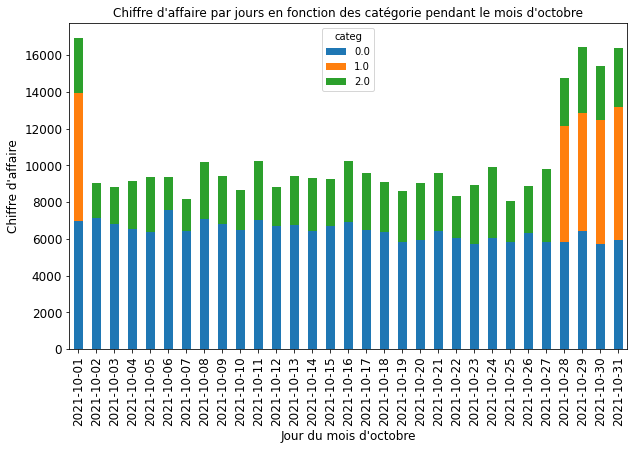

In [79]:
ax = pivot_CA_octobre['price_sum'].plot(kind='bar', title ="Chiffre d'affaire par jours en fonction des catégorie pendant le mois d'octobre",stacked=True, figsize=(10, 6), legend=True, fontsize=12)
ax.set_xlabel("Jour du mois d'octobre", fontsize=12)
ax.set_xticklabels(pivot_CA_octobre.index.format())
ax.set_ylabel("Chiffre d'affaire", fontsize=12)

plt.show()

On remarque qu'apartir du 2 octobre jusqu'au 27 il n'y a plus de produit de catégories 1 qui on été vendu.

<h2> <center> Mission n°3

In [80]:
!pip install pingouin

In [81]:
import pingouin as pg

from pingouin import welch_anova, read_dataset

<h3> 1) Analyse de corrélation de deux variables qualitatives (Chi-2) : sexe des clients et les catégories de produits achetés

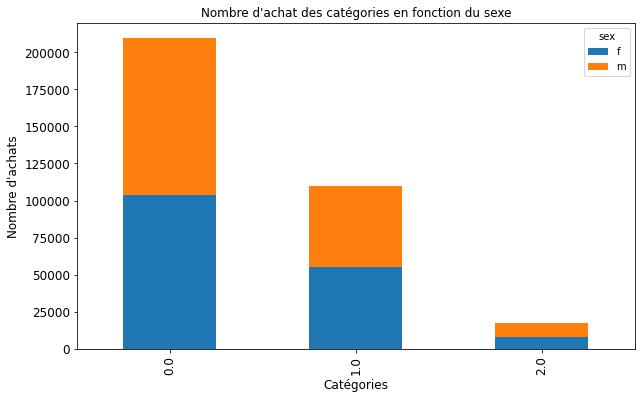

In [82]:
ax = pivot_sex_categ['categ_count'].plot(kind='bar', title ="Nombre d'achat des catégories en fonction du sexe", figsize=(10, 6), legend=True, fontsize=12,stacked=True)
ax.set_xlabel("Catégories", fontsize=12)
ax.set_ylabel("Nombre d'achats", fontsize=12)

plt.show()

In [83]:
X = "sex"
Y = "categ"

cont = df_clients_ventes_produits[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,103846,55469,8260,167575
m,105683,54266,9292,169241
Total,209529,109735,17552,336816


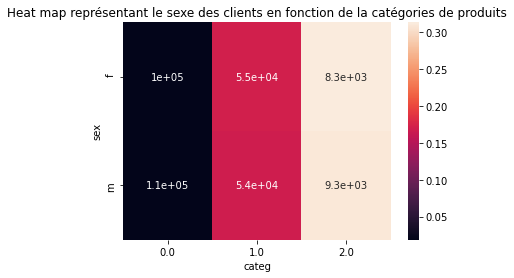

In [84]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_clients_ventes_produits)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
heat=sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
heat.set_title("Heat map représentant le sexe des clients en fonction de la catégories de produits")
plt.show()

In [85]:
expected, observed, stats = pg.chi2_independence(df_clients_ventes_produits,x="sex",y="categ")
expected

categ,0.0,1.0,2.0
sex,,,
f,104246.30117,54596.107741,8732.591088
m,105282.69883,55138.892259,8819.408912


In [86]:
observed

categ,0.0,1.0,2.0
sex,,,
f,103846,55469,8260
m,105683,54266,9292


In [87]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,81.733358,2.0,1.785775e-18,0.015578,1.0
1,cressie-read,0.666667,81.741634,2.0,1.778401e-18,0.015578,1.0
2,log-likelihood,0.000000,81.766805,2.0,1.756159e-18,0.015581,1.0
3,freeman-tukey,-0.500000,81.793235,2.0,1.733104e-18,0.015583,1.0
4,mod-log-likelihood,-1.000000,81.826152,2.0,1.704813e-18,0.015587,1.0
5,neyman,-2.000000,81.911501,2.0,1.633592e-18,0.015595,1.0


Avec une p-value inférieur à 0.05 (de 1.78e-18) ont peut supposer qu'il y a une dépendance entre l'achat des catégorie en fonction du sex.

<h3> 2.a) Analyse de corrélation ANOVA entre l'âge des clients et le montant total des achats

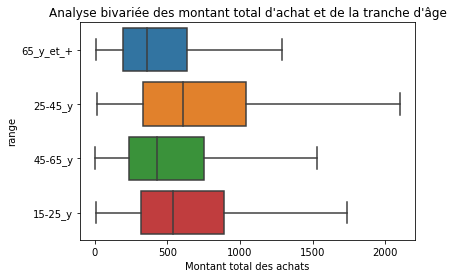

In [88]:
import seaborn as sns
y = total_age.range
x = total_age.price_sum
boxplot_age_price=sns.boxplot(x=x, y=y,data=total_age,orient="h", showfliers=False)
boxplot_age_price.set_xlabel('Montant total des achats')
boxplot_age_price.set_title("Analyse bivariée des montant total d'achat et de la tranche d'âge")
plt.show()

In [89]:
pg.welch_anova(df_clients_ventes_produits[["client_id","price","range"]].groupby(["client_id","range"]).sum().reset_index(),dv="price",between="range")

,Source,ddof1,ddof2,F,p-unc,np2
0,range,3,3855.356863,24.148793,1.771379e-15,0.002271


On remarque que la p-value est de 1.77e-15 donc inférieur à 0.05 et on peut supposer qu'il y a une dépendance entre l'age et le montant total

<h3> 2.b) Analyse de corrélation ANOVA entre l'âge des clients et la fréquence d'achat

In [90]:
freq_age_mois = df_clients_ventes_produits.groupby(['client_id','range','year_month']).agg({'id_prod':'count'}).rename(columns={'id_prod':'nb_commande'})
freq_age_mois=freq_age_mois.reset_index()
freq_age_mois

,client_id,range,year_month,nb_commande
0,c_1,65_y_et_+,2021-06,1
1,c_1,65_y_et_+,2021-07,4
2,c_1,65_y_et_+,2021-08,1
3,c_1,65_y_et_+,2021-09,2
4,c_1,65_y_et_+,2021-10,1
...,...,...,...,...
68029,c_999,45-65_y,2021-10,2
68030,c_999,45-65_y,2021-11,5
68031,c_999,45-65_y,2021-12,1
68032,c_999,45-65_y,2022-01,3


In [91]:
freq_age_mois.set_index('year_month')

,client_id,range,nb_commande
year_month,,,
2021-06,c_1,65_y_et_+,1
2021-07,c_1,65_y_et_+,4
2021-08,c_1,65_y_et_+,1
2021-09,c_1,65_y_et_+,2
2021-10,c_1,65_y_et_+,1
...,...,...,...
2021-10,c_999,45-65_y,2
2021-11,c_999,45-65_y,5
2021-12,c_999,45-65_y,1


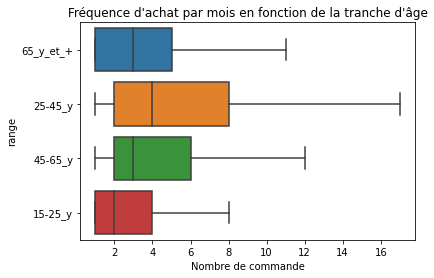

In [92]:
import seaborn as sns
y = freq_age_mois.range
x = freq_age_mois.nb_commande
boxplot_age_price=sns.boxplot(x=x, y=y,data=df_clients_ventes_produits,orient="h", showfliers=False)
boxplot_age_price.set_xlabel('Nombre de commande')
boxplot_age_price.set_title("Fréquence d'achat par mois en fonction de la tranche d'âge")
plt.show()

In [93]:
pg.welch_anova(df_clients_ventes_produits[["client_id","id_prod","range","year_month"]].groupby(["client_id","range","year_month"]).count().reset_index(),dv="id_prod",between="range")

,Source,ddof1,ddof2,F,p-unc,np2
0,range,3,28655.100849,244.486992,1.161251e-156,0.005912


<h3> 2.c) Analyse de corrélation ANOVA entre l'âge des clients et la taille du panier moyen

In [94]:
age_panier_moyen = df_clients_ventes_produits.groupby(['client_id','range']).agg({'session_id':'count'}).rename(columns={'id_prod':'nb_commande'})
age_panier_moyen=age_panier_moyen.reset_index()
age_panier_moyen

,client_id,range,session_id
0,c_1,65_y_et_+,20
1,c_10,65_y_et_+,28
2,c_100,25-45_y,6
3,c_1000,45-65_y,56
4,c_1001,25-45_y,58
...,...,...,...
8595,c_995,65_y_et_+,8
8596,c_996,45-65_y,42
8597,c_997,25-45_y,23
8598,c_998,15-25_y,28


In [95]:
age_panier_moyen.set_index('client_id')

,range,session_id
client_id,,
c_1,65_y_et_+,20
c_10,65_y_et_+,28
c_100,25-45_y,6
c_1000,45-65_y,56
c_1001,25-45_y,58
...,...,...
c_995,65_y_et_+,8
c_996,45-65_y,42
c_997,25-45_y,23


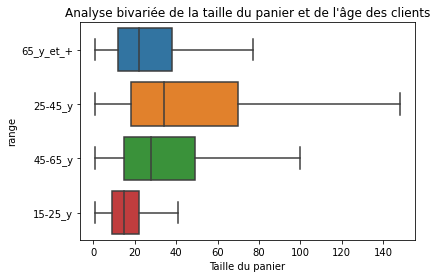

In [96]:
import seaborn as sns
y = age_panier_moyen.range
x = age_panier_moyen.session_id
boxplot_age_price=sns.boxplot(x=x, y=y,data=df_clients_ventes_produits,orient="h", showfliers=False)
boxplot_age_price.set_xlabel('Taille du panier')
boxplot_age_price.set_title("Analyse bivariée de la taille du panier et de l'âge des clients")
plt.show()

In [97]:
pg.welch_anova(df_clients_ventes_produits[["session_id","range",'client_id']].groupby(["range",'client_id']).count().reset_index(),dv="session_id",between="range")

,Source,ddof1,ddof2,F,p-unc,np2
0,range,3,4079.794648,33.977972,1.102418e-21,0.006679


<h3> 2.d) Analyse de corrélation CHI-2 entre l'âge des clients et les catégories de produits achetés

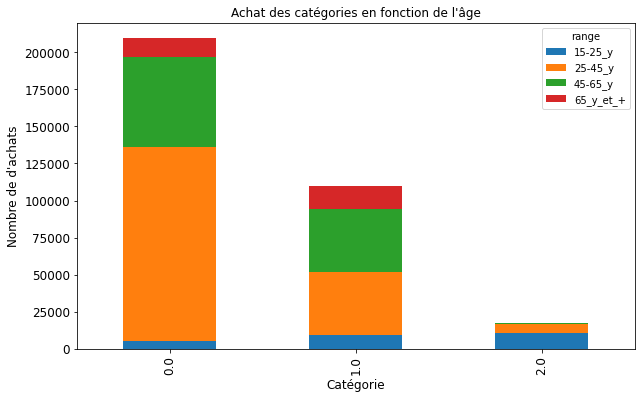

In [98]:
ax = pivot_age_categ['categ_count'].plot(kind='bar', title ="Achat des catégories en fonction de l'âge", figsize=(10, 6), legend=True, fontsize=12,stacked=True)
ax.set_xlabel("Catégorie", fontsize=12)
ax.set_ylabel("Nombre de d'achats", fontsize=12)

plt.show()

In [99]:
X = "range"
Y = "categ"

cont = df_clients_ventes_produits[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
range,,,,
15-25_y,5380,9491,10751,25622
25-45_y,130758,42391,5832,178981
45-65_y,60909,42295,739,103943
65_y_et_+,12482,15558,230,28270
Total,209529,109735,17552,336816


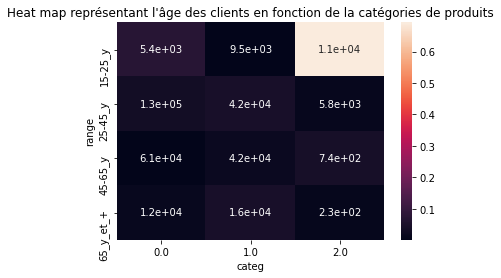

In [100]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_clients_ventes_produits)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
heat_2=sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
heat_2.set_title("Heat map représentant l'âge des clients en fonction de la catégories de produits")
plt.show()

In [101]:
expected, observed, stats = pg.chi2_independence(df_clients_ventes_produits,x="range",y="categ")
expected

categ,0.0,1.0,2.0
range,,,
15-25_y,15939.124145,8347.674012,1335.201843
25-45_y,111341.830403,58312.194299,9326.975298
45-65_y,64661.633791,33864.736548,5416.629661
65_y_et_+,17586.411661,9210.395142,1473.193197


In [102]:
observed

categ,0.0,1.0,2.0
range,,,
15-25_y,5380,9491,10751
25-45_y,130758,42391,5832
45-65_y,60909,42295,739
65_y_et_+,12482,15558,230


In [103]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,95855.185133,6.0,0.0,0.377222,1.0
1,cressie-read,0.666667,77846.845047,6.0,0.0,0.339945,1.0
2,log-likelihood,0.000000,60602.936252,6.0,0.0,0.299941,1.0
3,freeman-tukey,-0.500000,57118.472840,6.0,0.0,0.291190,1.0
4,mod-log-likelihood,-1.000000,59190.509178,6.0,0.0,0.296425,1.0
5,neyman,-2.000000,82981.669097,6.0,0.0,0.350978,1.0


On observe une p-value inférieur à 0.05 donc on peut supposer qu'il y a une dépendance entre l'age et la catégorie de produits acheté

In [104]:
df_clients_ventes_produits.to_csv("D:/Lena/Desktop/OpenClassroom/final.csv", index = False)